In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.optimize import minimize, curve_fit

In [2]:
data = pd.read_excel("431.ods", engine="odf")
data

,ЧАСТЬ А,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,p6,"L, cm",69.9,(микроскоп в наале),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,В случае чего ± 6 см,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p8,"z, cm",sigma_z,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,68.1,0.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,68.8,0.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,69.1,0.5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,69.3,0.5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,69.4,0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$\textbf{Пункт А}$

In [3]:
A_p8_zn_data = data.iloc[4:9, 1:4]
A_p8_zn_data = A_p8_zn_data.reset_index(drop=True)
A_p8_zn_data = A_p8_zn_data.rename(columns={"Unnamed: 1": "z", "Unnamed: 2": "sigmz_z", "Unnamed: 3": "n"})
A_p8_zn_data

,z,sigmz_z,n
0,68.1,0.5,1
1,68.8,0.5,2
2,69.1,0.5,3
3,69.3,0.5,4
4,69.4,0.5,5


In [4]:
A_p10_zn_data = data.iloc[17:22, 1:4]
A_p10_zn_data = A_p10_zn_data.reset_index(drop=True)
A_p10_zn_data = A_p10_zn_data.rename(columns={"Unnamed: 1": "z", "Unnamed: 2": "sigmz_z", "Unnamed: 3": "n"})
A_p10_zn_data

,z,sigmz_z,n
0,67.8,0.5,1
1,68.4,0.5,2
2,68.9,0.5,3
3,69.2,0.5,4
4,69.3,0.5,5


In [5]:
L = data["Unnamed: 2"][0]
L

69.9

In [6]:
def linear_func(x, k, b):
    return k*x + b

$$\cfrac{k}{z-L} = m \implies z-L = \cfrac{k}{m} \implies z = \cfrac{k}{m} + L$$

In [7]:
1/A_p8_zn_data["n"]

0         1.0
1         0.5
2    0.333333
3        0.25
4         0.2
Name: n, dtype: object

In [8]:
A_p8_zn_data["z"]

0    68.1
1    68.8
2    69.1
3    69.3
4    69.4
Name: z, dtype: object

In [17]:
popt8, *pcov = curve_fit(linear_func, xdata=1/A_p8_zn_data["n"], ydata=L - A_p8_zn_data["z"], p0=(1, 1))
popt10, *pcov = curve_fit(linear_func, xdata=1/A_p10_zn_data["n"], ydata=L - A_p10_zn_data["z"], p0=(1, 1))

k8, L8_ = popt8
k10, L10_ = popt10
L8_, L10_, k8, k10

(np.float64(0.22798310504083485),
 np.float64(0.3293558614102391),
 np.float64(1.6029567048148174),
 np.float64(1.8627243918231697))

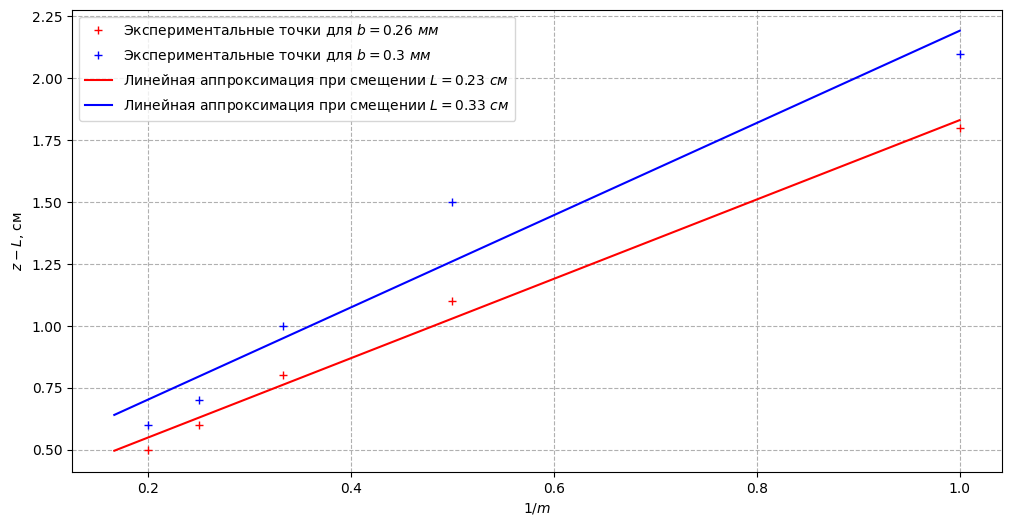

In [32]:
x_model = 1/np.linspace(1, 6, 1000)
y_model8 = linear_func(x_model, k8, L8_)
y_model10 = linear_func(x_model, k10, L10_)


plt.figure(figsize=(12, 6))
plt.grid(True, linestyle="--")
plt.xlabel(r"$1/m$")
plt.ylabel(r"$z-L$, см")
plt.plot(1/A_p8_zn_data["n"], L - A_p8_zn_data["z"], "+r", label="Экспериментальные точки для $b = 0.26 \\ мм$")
plt.plot(1/A_p10_zn_data["n"], L - A_p10_zn_data["z"], "+b", label="Экспериментальные точки для $b = 0.3 \\ мм$")
plt.plot(x_model, y_model8, color="red", label=f"Линейная аппроксимация при смещении $L = {"{:.2f}".format(L8_)} \\ см$")
plt.plot(x_model, y_model10, color="blue", label=f"Линейная аппроксимация при смещении $L = {"{:.2f}".format(L10_)} \\ см$")
plt.legend()
plt.savefig("graph_A.pdf", format="pdf")

In [20]:
def chi_squared(params, y_obs, x_data, sigma, model):
    y_expected = model(x_data, **params)
    return np.sum(((y_obs - y_expected) / sigma) ** 2)

In [23]:
print(f"$\\chi^2 = {chi_squared({"k": k8, "b": L8_},
                                L - A_p8_zn_data["z"],
                                1/A_p8_zn_data["n"],
                                A_p8_zn_data["sigmz_z"],
                                linear_func)}$")

print(f"$\\chi^2 = {chi_squared({"k": k10, "b": L10_},
                                L - A_p10_zn_data["z"],
                                1/A_p10_zn_data["n"],
                                A_p10_zn_data["sigmz_z"],
                                linear_func)}$")

$\chi^2 = 0.04215417106652926$
$\chi^2 = 0.35049630411825283$


$$ m_{max} = \cfrac{b^2}{4 \lambda z} \implies z = \cfrac{b^2}{4 \lambda m_{max}} \implies k = \cfrac{b^2}{4 \lambda} \implies b = 2\sqrt{k \lambda}$$

In [45]:
lmbda = data["Unnamed: 2"][24]
b8 = 2 * (k8 /100 * lmbda * 10 ** (-9))**0.5
print(f"p8: b = {"${:.2}$".format(float(b8))}")

b10 = 2 * (k10/100 * lmbda * 10 **(-9))**0.5
print(f"p10: b = {"${:.2}$".format(float(b10))}")

p8: b = $0.00019$
p10: b = $0.00021$


$\textbf{Пункт Б}$

In [26]:
left_xm = data.iloc[29:39, 0:5]
left_xm = left_xm.reset_index(drop=True)
left_xm = left_xm.rename(columns={"ЧАСТЬ А": "m", "Unnamed: 1": "x_m_del", "Unnamed: 2": "sigma_m", "Unnamed: 3": "x_m_mm", "Unnamed: 4": "sigma_x"})
left_xm

,m,x_m_del,sigma_m,x_m_mm,sigma_x
0,1,19,1,0.38,0.02
1,2,31,1,0.62,0.02
2,3,43,1,0.86,0.02
3,4,55,1,1.1,0.02
4,5,62,1,1.24,0.02
5,6,75,1,1.5,0.02
6,7,87,1,1.74,0.02
7,8,105,1,2.1,0.02
8,9,116,1,2.32,0.02
9,10,128,1,2.56,0.02


In [27]:
right_xm = data.iloc[29:39, 6:11]
right_xm = right_xm.reset_index(drop=True)
right_xm = right_xm.rename(columns={"Unnamed: 6": "m", "Unnamed: 7": "x_m_del", "Unnamed: 8": "sigma_m", "Unnamed: 9": "x_m_mm", "Unnamed: 10": "sigma_x"})
right_xm

,m,x_m_del,sigma_m,x_m_mm,sigma_x
0,1,20,1,0.4,0.02
1,2,32,1,0.64,0.02
2,3,44,1,0.88,0.02
3,4,57,1,1.14,0.02
4,5,69,1,1.38,0.02
5,6,82,1,1.64,0.02
6,7,95,1,1.9,0.02
7,8,106,1,2.12,0.02
8,9,119,1,2.38,0.02
9,10,123,1,2.46,0.02


In [28]:
popt_left, *pcov = curve_fit(linear_func, xdata=left_xm["m"], ydata=left_xm["x_m_mm"], p0=(1, 1))
popt_right, *pcov = curve_fit(linear_func, xdata=right_xm["m"], ydata=right_xm["x_m_mm"], p0=(1, 1))

popt_left, popt_right

(array([0.24181818, 0.112     ]), array([0.23915152, 0.17866667]))

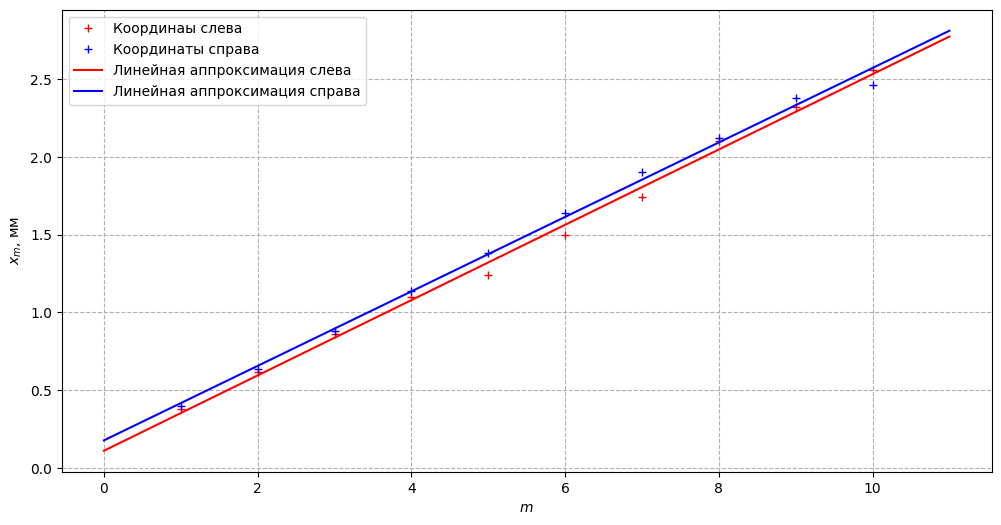

In [31]:
x_model = np.linspace(0, 11, 1000)
y_model_left = linear_func(x_model, popt_left[0], popt_left[1])
y_model_right = linear_func(x_model, popt_right[0], popt_right[1])


plt.figure(figsize=(12, 6))
plt.grid(True, linestyle="--")
plt.xlabel(r"$m$")
plt.ylabel(r"$x_m$, мм")
plt.plot(left_xm["m"], left_xm["x_m_mm"], "+r", label="Координаы слева")
plt.plot(right_xm["m"], right_xm["x_m_mm"], "+b", label="Координаты справа")
plt.plot(x_model, y_model_left, color="red", label=f"Линейная аппроксимация слева")
plt.plot(x_model, y_model_right, color="blue", label=f"Линейная аппроксимация справа")
plt.legend()
plt.savefig("graph_B.pdf", format="pdf")

In [33]:
print(f"left \\chi^2 = {chi_squared({"k": popt_left[0], "b": popt_left[1]},
                                left_xm["x_m_mm"],
                                left_xm["m"],
                                left_xm["sigma_x"],
                                linear_func)}")

print(f"left \\chi^2 = {chi_squared({"k": popt_right[0], "b": popt_right[1]},
                                right_xm["x_m_mm"],
                                right_xm["m"],
                                right_xm["sigma_x"],
                                linear_func)}")

left \chi^2 = 54.21818181818192
left \chi^2 = 47.951515151515146
